# PCA

Ah, it's just a method of summarizing some data. 

Grandmother: This is interesting! So this PCA thing checks what characteristics are redundant and discards them?

You: Excellent question, granny! No, PCA is not selecting some characteristics and discarding the others. Instead, it constructs some new characteristics that turn out to summarize our list of wines well. Of course these new characteristics are constructed using the old ones

In fact, PCA finds the best possible characteristics, the ones that summarize the list of wines as well as only possible (among all conceivable linear combinations). This is why it is so useful.


You: I guess I can give two different answers to this question. First answer is that you are looking for some wine properties (characteristics) that strongly differ across wines.

The second answer is that you look for the properties that would allow you to predict, or "reconstruct", the original wine characteristics.

Surprisingly, it turns out that these two aims are equivalent and so PCA can kill two birds with one stone.

首先理解两个矩阵相乘的几何意义：将右边矩阵中的每一列列向量变换到左边矩阵中每一行行向量为基所表示的空间中去。



谢邀。题主的问题是“为什么PCA可以通过分解协方差矩阵计算，也可以通过分解内积矩阵计算？”原因很简单，假设是已经中心化过（PCA要求数据中心化）的数据矩阵，每列都是一个样本，那么协方差矩阵是，而PCA的目标函数是 

\begin{equation*}
max(W^TX^TXW)
s.t. W^TW = I
\end{equation*}

Using lagrange mulitplier then use first derivirative, we know \begin{equation*}X^TXw1 = \lambda*w1\end{equation*}

this means when W is the eigenvector we can maxmize the objective funciton.

and we also knwo from SVD V is the eigenvector space, and lambda = d^2/(n-1)


convariance = X^TX/(n-1), with lamda and V
then XTX * V = lambda *V
XXT *XV = lambda * XV
then XXT has engen vector XV and eigen value lambda
when P>>n, it has benifit


所以，分解协方差矩阵 或 内积矩阵X^TX, or SVD of original matrix 都可以求解PCA。

-- 如何做feature selection， 你喜欢用什么方法，我回答pca，接着问什么是pca，最终得出的结果是什么，在什么条件下用。我说最后得出的是linearcombination of features to better extract information, do dimension reduction. 接着问，pca的linear combination 是怎么算出来的，简述算法，我回答用feature的product谱分解，特征值排序，取95%。接着问，pca在共线时候能不能用，当然能，就是做这个的，接着问，什么时候不能用，回答不是gaussian时候不能用。问怎么判断是不是Gaussian分布,回答qqplot，或者visualize看是不是椭圆。接着问为什么不是gaussian不能用，如果有一个feature，用pca看不显著，但其实包含有用信息，怎么处理，给跪--------后来想了一下，正确答案是因为gaussian是exponential family, pca是根据mean/variance来的，只有正态时候满足他们是sufficient，另一个问题的答案其实简单， 作kernel，nonlinear 等等。

1. limitation comes down to it is a unsupervised learning model. "Most variance" is very often the most important, but not always. Large variance = low covariance = high importance
This assumption depends of what problem do you want to solve:
If you want to compress or remove noise from your dataset this assumption is an advantage
For mostly any other problem (like Blind Source Separation) it is not useful. Based on Independent Component Analysis theory: uncorrelated is only partly independent.

2. As you said those are some ofe the limitatios of PCA, what i'm gonna do is (trying) to explain those points:
Relies on linear asumptions
PCA is focused on finding orthogonal projections of the dataset that contains the highest variance possible in order to 'find hidden LINEAR correlations' between variables of the dataset. This means that if you have some of the variables in your dataset that are linearly correlated, PCA can find directions that represents your data.

3. As I said before, PCA always finds orthogonal principal components. Sometimes, our data demands non-orthogonal principal components to represent the data.

4. It use mean and covariance matirx, they are sufficient statistics for multivariate guassian, might not be suffiicent for other distribution. It shows that PCA make an implicit assumption that data should follows Gaussian distribution. If data didn’t follow Gaussian distribution, it would be difficult to extract independent statistical components by PCA.

5. scale variant
PCA, as you could've seen, is a rotation trasnformation of your dataset, wich means that doens't affect the scale of your data. It's worth to said also that in PCA you dont normalize your data. That means that if you change the scale of just some of the variables in your data set, you will get different results by applying PCA .


作者：史博
链接：https://www.zhihu.com/question/30094611/answer/275172932
来源：知乎
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

千万不要小看PCA， 很多人隐约知道求解最大特征值，其实并不理解PCA是对什么东西求解特征值和特征向量。  也不理解为什么是求解特征值和特征向量。 要理解到Hinton对PCA的认知，需要跨过4个境界，而上面仅仅是第1个境界的问题。为什么要理解PCA？其实深度学习在成为深度学习以前，主要是特征表达学习， 而特征表达学习追溯到始祖象阶段，主要是无监督特征表达PCA和有监督特征表达LDA。  对了这里LDA不是主题模型的LDA，是统计鼻祖Fisher搞的linear discriminant analysis（参考“Lasso简史”）。 而Hinton在这方面的造诣惊人， 这也是为什么他和学生一起能搞出牛牛的 t-Distributed Stochastic Neighbor Embedding (t-SNE) 。<img src="https://pic4.zhimg.com/50/v2-b4bef95786de9d3e71215c05a9977962_hd.jpg" data-caption="" data-size="normal" data-rawwidth="1334" data-rawheight="468" class="origin_image zh-lightbox-thumb" width="1334" data-original="https://pic4.zhimg.com/v2-b4bef95786de9d3e71215c05a9977962_r.jpg">至于t-SNE为啥牛， 这里给两个对比图片， 然后我们再回到PCA，以后有机会再扩展！t-SNE vs PCA：  可以看到线性特征表达的局限性<img src="https://pic3.zhimg.com/50/v2-dd2da0270fc42ac936de5af39a732bf6_hd.jpg" data-caption="" data-size="normal" data-rawwidth="440" data-rawheight="451" class="origin_image zh-lightbox-thumb" width="440" data-original="https://pic3.zhimg.com/v2-dd2da0270fc42ac936de5af39a732bf6_r.jpg">t-SNE 优于 已有非线性特征表达 Isomap, LLE 和 Sammon mapping<img src="https://pic2.zhimg.com/50/v2-0cacf5d8d953d12c9850ac3c514cec20_hd.jpg" data-caption="" data-size="small" data-rawwidth="638" data-rawheight="479" class="origin_image zh-lightbox-thumb" width="638" data-original="https://pic2.zhimg.com/v2-0cacf5d8d953d12c9850ac3c514cec20_r.jpg">依然还记得2004年左右Isomap横空出世的惊奇， 再看t-SNE的诞生，真是膜拜！ 也正是Hinton对PCA能理解到他的境界， 他才能发明t-SNE。 PCA理解第一层境界：最大方差投影正如PCA的名字一样， 你要找到主成分所在方向， 那么这个主成分所在方向是如何来的呢？<img src="https://pic1.zhimg.com/50/v2-90e3caccd8d060a167dbcc921817f68c_hd.jpg" data-caption="" data-size="small" data-rawwidth="912" data-rawheight="726" class="origin_image zh-lightbox-thumb" width="912" data-original="https://pic1.zhimg.com/v2-90e3caccd8d060a167dbcc921817f68c_r.jpg">其实是希望你找到一个垂直的新的坐标系， 然后投影过去， 这里有两个问题。 第一问题： 找这个坐标系的标准或者目标是什么？  第二个问题， 为什么要垂直的， 如果不是垂直的呢？   如果你能理解第一个问题， 那么你就知道为什么PCA主成分是特征值和特征向量了。  如果你能理解第二个问题， 那么你就知道PCA和ICA到底有什么区别了。 <img src="https://pic4.zhimg.com/50/v2-89977937b1a53a4687bc8611a9ffcd61_hd.jpg" data-caption="" data-size="small" data-rawwidth="1298" data-rawheight="528" class="origin_image zh-lightbox-thumb" width="1298" data-original="https://pic4.zhimg.com/v2-89977937b1a53a4687bc8611a9ffcd61_r.jpg">对于第一个问题： 其实是要求解方差最小或者最大。 按照这个目标， 你代入拉格朗日求最值， 你可以解出来， 主成分方向，刚好是S的特征向量和特征值！ 是不是很神奇？  伟大的拉格朗日(参考 "一步一步走向锥规划 - QP" "一挑三 FJ vs KKT ")<img src="https://pic2.zhimg.com/50/v2-40c295c16cbdc1d10c4e5d6cddd275c9_hd.jpg" data-caption="" data-size="small" data-rawwidth="1572" data-rawheight="782" class="origin_image zh-lightbox-thumb" width="1572" data-original="https://pic2.zhimg.com/v2-40c295c16cbdc1d10c4e5d6cddd275c9_r.jpg">现在回答了，希望你理解了， PCA是对什么东西求解特征值和特征向量。 也理解为什么是求解的结果就是特征值和特征向量吧！这仅仅是PCA的本意！ 我们也经常看到PCA用在图像处理里面， 希望用最早的主成分重建图像：<img src="https://pic2.zhimg.com/50/v2-45b3271a2a34315495a5bb57637b7700_hd.jpg" data-caption="" data-size="small" data-rawwidth="866" data-rawheight="750" class="origin_image zh-lightbox-thumb" width="866" data-original="https://pic2.zhimg.com/v2-45b3271a2a34315495a5bb57637b7700_r.jpg">这是怎么做到的呢？PCA理解第二层境界：最小重建误差什么是重建， 那么就是找个新的基坐标， 然后减少一维或者多维自由度。  然后重建整个数据。 好比你找到一个新的视角去看这个问题， 但是希望自由度小一维或者几维。 <img src="https://pic2.zhimg.com/50/v2-14154f7ac045eb84586b2e176f8c238e_hd.jpg" data-caption="" data-size="small" data-rawwidth="1324" data-rawheight="586" class="origin_image zh-lightbox-thumb" width="1324" data-original="https://pic2.zhimg.com/v2-14154f7ac045eb84586b2e176f8c238e_r.jpg">那么目标就是要最小重建误差，同样我们可以根据最小重建误差推导出类似的目标形式。 <img src="https://pic1.zhimg.com/50/v2-043e8f55cf916ec12d190c6bf523a9fd_hd.jpg" data-caption="" data-size="small" data-rawwidth="958" data-rawheight="728" class="origin_image zh-lightbox-thumb" width="958" data-original="https://pic1.zhimg.com/v2-043e8f55cf916ec12d190c6bf523a9fd_r.jpg">虽然在第二层境界里面， 也可以直观的看成忽略了最小特征值对应的特征向量所在的维度。  但是你能体会到和第一层境界的差别么？ 一个是找主成分， 一个是维度缩减。  所以在这个层次上，才是把PCA看成降维工具的最佳视角。 PCA理解第三层境界：高斯先验误差在第二层的基础上， 如果引入最小二乘法和带高斯先验的最大似然估计的等价性。（参考"一步一步走向锥规划 - LS" “最小二乘法的4种求解” ） 那么就到了理解的第三层境界了。 <img src="https://pic1.zhimg.com/50/v2-4b90808d920ef4b58e3171d49aa4d1a9_hd.jpg" data-caption="" data-size="small" data-rawwidth="866" data-rawheight="662" class="origin_image zh-lightbox-thumb" width="866" data-original="https://pic1.zhimg.com/v2-4b90808d920ef4b58e3171d49aa4d1a9_r.jpg">所以， 重最小重建误差， 我们知道求解最小二乘法， 从最小二乘法， 我们可以得到高斯先验误差。  <img src="https://pic4.zhimg.com/50/v2-e4e3345d5df9d26291a21a9411cb314b_hd.jpg" data-caption="" data-size="small" data-rawwidth="1384" data-rawheight="622" class="origin_image zh-lightbox-thumb" width="1384" data-original="https://pic4.zhimg.com/v2-e4e3345d5df9d26291a21a9411cb314b_r.jpg">有了高斯先验误差的认识，我们对PCA的理解， 进入了概率分布的层次了。 而正是基于这个概率分布层次的理解， 才能走到Hinton的理解境界。 PCA理解第四层境界(Hinton境界)：线性流形对齐如果我们把高斯先验的认识， 到到数据联合分布， 但是如果把数据概率值看成是空间。  那么我们可以直接到达一个新的空间认知。 <img src="https://pic2.zhimg.com/50/v2-db6a00970793160be46f749ab410ec89_hd.jpg" data-caption="" data-size="small" data-rawwidth="1054" data-rawheight="680" class="origin_image zh-lightbox-thumb" width="1054" data-original="https://pic2.zhimg.com/v2-db6a00970793160be46f749ab410ec89_r.jpg">这就是“Deep Learning”书里面写的， 烙饼空间（Pancake）， 而在烙饼空间里面找一个线性流行，就是PCA要干的事情。 我们看到目标函数形式和最小重建误差完全一致。  但是认知完全不在一个层次了。 <img src="https://pic1.zhimg.com/50/v2-91a127837e4b428e390316954668e27f_hd.jpg" data-caption="" data-size="small" data-rawwidth="872" data-rawheight="732" class="origin_image zh-lightbox-thumb" width="872" data-original="https://pic1.zhimg.com/v2-91a127837e4b428e390316954668e27f_r.jpg">小结这里罗列理解PCA的4种境界，试图通过解释Hinton如何理解PCA的， 来强调PCA的重要程度。  尤其崇拜Hinton对简单问题的高深认知。不仅仅是PCA，尤其是他对EM算法的再认识， 诞生了VBEM算法， 让VB算法完全从物理界过渡到了机器学习界（参考 “变の贝叶斯”）。 有机会可以看我对EM算法的回答，理解EM算法的8种境界。

In [17]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values
y = df.ix[:,4].values

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.style.available)

['fivethirtyeight', 'ggplot', 'dark_background', 'grayscale', 'bmh']


In [ ]:

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('ggplot'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

# 1.Standardzing the data!

Standardizing
Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

essentially we want to map the data into smaller feature space. One variable variance dominate won't help us anywhere

In [19]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [20]:
type(X_std)

numpy.ndarray

# 2.Covariance Matrix

In [6]:
import numpy as np

## mean center yeils the covariance
mean_vec = np.mean(X_std, axis=0)

cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [7]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


## 3.computing the eigenvector and corresponding eigenvalues 

To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [8]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [9]:
## check the eigenvector is 1 length
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


Theorem: Any symmetric matrix
1) has only real eigenvalues;
2) is always diagonalizable;
3) has orthogonal eigenvectors.

# What about using SVD to calculate the eigvec 

PCA is just eigen value decomposition on covariance matrix. 

### Covariance matrix > symetric matrix > N linear indepdent eigenvector and V is orthogonal >

\begin{equation*}
Covariance  = \frac{A^t A}{(n-1)}  =V\frac{D^2}{(n-1)}V^{-1}= V\frac{D^2}{(n-1)}V^T
\end{equation*}

since for orthogonal matrix:
\begin{equation*}
V^T = V^{-1}
\end{equation*}

Then the V and D can be connected with SVD decomposition, because it also come from


since for orthogonal matrix:
\begin{equation*}
A^T A = VDU^T * UDV^T 
\end{equation*}
since U V are both orthogonal matrix


In [11]:
u,s,v = np.linalg.svd(X_std)

\begin{equation*}
A   = UDV^{-1}
\end{equation*}

The singular value decomposition (SVD) factorizes a linear operator A : R
n → R
m into three simpler linear
operators:
1. Projection z = V
T
x into an r-dimensional space, where r is the rank of A
2. Element-wise multiplication with r singular values σi
, i.e., z
0 = Sz
3. Transformation y = Uz0
to the m-dimensional output space
Combining these statements, A can be re-written as
A = USVT
(1)
with U an m×r orthonormal matrix spanning A’s column space im(A), S an r×r diagonal matrix of singular
values, and V an n×r orthonormal matrix spanning A’s row space im(A
T
).

As @ttnphns and @nick-cox said, SVD is a numerical method and PCA is an analysis approach (like least squares). You can do PCA using SVD, or you can do PCA doing the eigen-decomposition of XTX (or XXT), or you can do PCA using many other methods, just like you can solve least squares with a dozen different algorithms like Newton's method or gradient descent or SVD etc.

As you state in the question, principal component analysis (PCA) can be carried out either by SVD of the centered data matrix X (see this Q&A thread for more details) or by the eigen-decomposition of the covariance matrix 1n−1X⊤X (or, alternatively, XX⊤ if n≪p, see here for more details).


Principal component algorithm that pca uses to perform the principal component analysis [...]:

'svd' -- Default. Singular value decomposition (SVD) of X.

'eig' -- Eigenvalue decomposition (EIG) of the covariance matrix. The EIG algorithm is faster than SVD when the number of observations, n, exceeds the number of variables, p, but is less accurate because the condition number of the covariance is the square of the condition number of X.

In [12]:
S = np.zeros((X_std.shape[0],4), dtype=complex)
S[:4, :4] = np.diag(s)

In [13]:
u.shape

(150, 150)

In [14]:
np.allclose(X_std, np.dot(u, np.dot(S, v)))

True

In [15]:
## check the orthogonal of symetric matrix 
np.allclose(v,inv(v.T))

NameError: name 'inv' is not defined

\begin{equation*}
\lambda = d^2/(n-1)
\end{equation*}

In [16]:
## connection between SVD on A and eigen vector decompose on AtA/(n-1)
## lambda = d^2/(n-1)

s*s/(X_std.shape[0]-1)

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [17]:
eig_vals

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

EigenVector is indeed is the column vecter of the SVD decomposition

In [18]:
eig_vecs.T

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [19]:
v

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

The priciple is 
\begin{equation*}
V*D = X^TU = Z
\end{equation*}


In [20]:
np.array([np.sqrt(i[0]*(X_std.shape[0]-1))*i[1] for i in eig_pairs]).T

array([[ 10.9152261 ,  -4.37665169,  -3.38977537,   0.46063236],
       [ -5.50293763, -10.88003921,   1.13788899,  -0.2182499 ],
       [ 12.14560409,  -0.2479719 ,   0.66238831,  -1.40856411],
       [ 11.81873642,  -0.76897103,   2.97974244,   0.92048251]])

In [21]:
X_std.T.dot(u[:,:4])

array([[ 10.9152261 ,  -4.37665169,   3.38977537,   0.46063236],
       [ -5.50293763, -10.88003921,  -1.13788899,  -0.2182499 ],
       [ 12.14560409,  -0.2479719 ,  -0.66238831,  -1.40856411],
       [ 11.81873642,  -0.76897103,  -2.97974244,   0.92048251]])

In [22]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)
print("we kept the first two priciples, or the first two eigen vector directions")

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]
we kept the first two priciples, or the first two eigen vector directions


In [23]:
matrix_w.shape

(4, 2)

In [24]:
transformed = X_std.dot(matrix_w)
assert transformed.shape == (X_std.shape[0],2), "The matrix is not 2x40 dimensional."

In [25]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls_exp 

In [29]:
import plotly as py
py.tools.set_credentials_file(username='zihaozhang', api_key='JbmzY8JZtcJglNgcEBJW')
import plotly.plotly as py
import plotly.tools as plotly_tools
from plotly.graph_objs import *
py.sign_in("zihaozhang", "JbmzY8JZtcJglNgcEBJW")

In [30]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [31]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [32]:
Y = X_std.dot(matrix_w)

In [33]:
traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [37]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [38]:

traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y_sklearn[y==name,0],
        y=Y_sklearn[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

# Other application of PCA

Dimensionality reduction using PCA
PCA is a technique for reducing the number of dimensions in a dataset whilst retaining most information. It is using the correlation between some dimensions and tries to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. It does not do this using guesswork but using hard mathematics and it uses something known as the eigenvalues and eigenvectors of the data-matrix. These eigenvectors of the covariance matrix have the property that they point along the major directions of variation in the data. These are the directions of maximum variation in a dataset.

I am not going to get into the actual derivation and calculation of the principal components — if you want to get into the mathematics see this great page — instead we’ll use the Scikit-Learn implementation of PCA.

Since we as humans like our two- and three-dimensional plots lets start with that and generate, from the original 784 dimensions, the first three principal components. And we’ll also see how much of the variation in the total dataset they actually account for.


https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [30]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original",data_home='/Users/zihaozhang/Downloads')
X = mnist.data / 255.0
y = mnist.target

In [31]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

In [32]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [33]:
rndperm = np.random.permutation(df.shape[0])

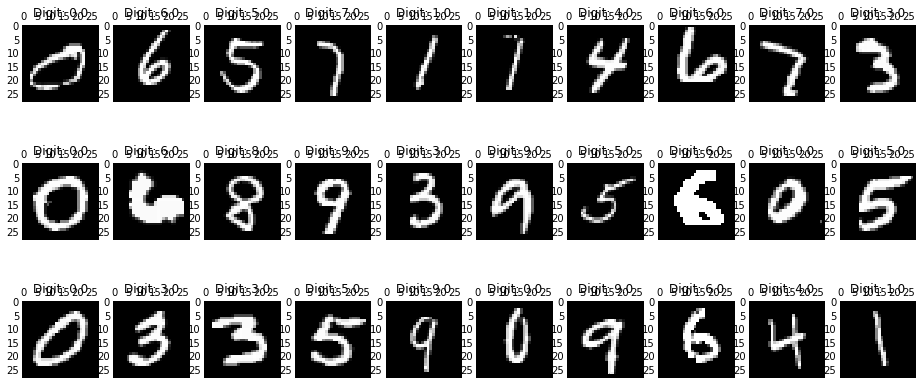

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=49)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531  0.05403385  0.04888934  0.04305227
  0.03278262  0.02889642  0.02758364  0.0234214   0.02106689  0.02037553
  0.01707064  0.0169402   0.01583382  0.01486345  0.01319358  0.01279014
  0.01187272  0.01152937  0.0106604   0.01009794  0.00959151  0.00909635
  0.00883287  0.00838818  0.00809832  0.00785718  0.00740262  0.00690014
  0.00656144  0.0064547   0.00600819  0.00585612  0.00566754  0.00543471
  0.00504717  0.00487079  0.00478955  0.00467594  0.00454369  0.00444918
  0.00418217  0.00396164  0.00383708  0.00375785  0.00361426  0.00349025
  0.00338732]


In [7]:
np.sum(pca.explained_variance_ratio_)

0.82222187714437955

/Users/zihaozhang/anaconda/lib/python3.5/site-packages/ggplot/ggplot.py:192: RuntimeWarning: Setting "mpl.rcParams['axes.prop_cycle']=cycler('color', ['#333333', '#348ABD', '#7A68A6', '#A60628', '#467821', '#CF4457', '#188487', '#E24A33'])" raised an Exception: 'axes.prop_cycle is not a valid rc parameter.See rcParams.keys() for a list of valid parameters.'
  warnings.warn(msg, RuntimeWarning)
/Users/zihaozhang/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


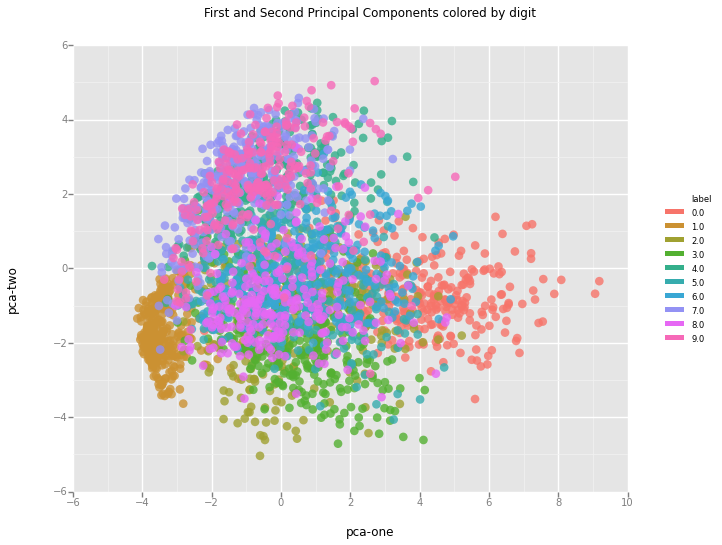

<ggplot: (-9223372036531375237)>

In [8]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [63]:
a=pca.fit(df[feat_cols].values)

In [66]:
df[feat_cols].shape

(70000, 784)

In [65]:
a.components_.shape

(49, 784)

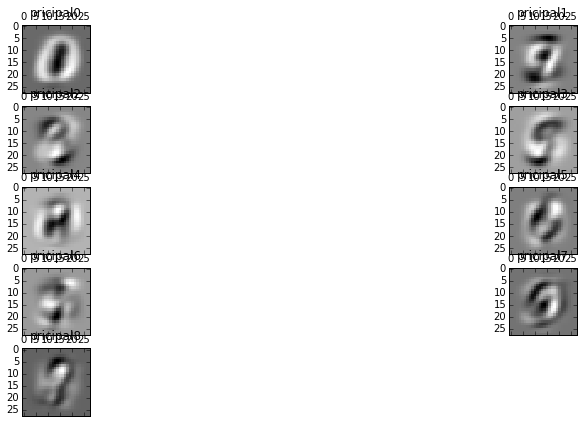

In [71]:
# 显示一些图像（均值图像和前 7 个模式）
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,9):
    ax = fig.add_subplot(5,2,i+1, title='pricipal' + str(i) )
    ax.matshow(a.components_[i,:].reshape((28,28)).astype(float))

plt.show() 

上面展示的是平均图像（左上第一幅）和前7个模式（具有最大方差的方向模式，不是降维的结果

In [72]:
Y=df[feat_cols].dot(a.components_.T)

In [83]:
np.allclose(Y, pca_result)

False

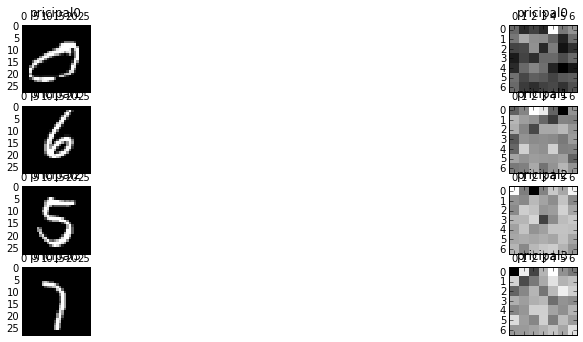

In [65]:
# 显示一些图像（均值图像和前 7 个模式）
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,4):
    ax = fig.add_subplot(5,2,2*i+1, title='pricipal' + str(i) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    ax = fig.add_subplot(5,2,2*i+2, title='pricipal' + str(i) )
    ax.matshow(pca_result[rndperm[i],:].reshape((7,7)).astype(float))

plt.show() 

In [55]:
old = df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float)

In [56]:
u,s,v = np.linalg.svd(old)

In [57]:
S = np.zeros((28,28), dtype=complex)
S[:3, :3] = np.diag(s[:3])

In [58]:
v.shape

(28, 28)

In [59]:
newplot = np.dot(u, np.dot(S, v))

In [62]:
newplot.shape

(28, 28)

/Users/zihaozhang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part


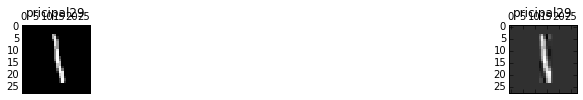

In [63]:
# 显示一些图像（均值图像和前 7 个模式）
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
ax = fig.add_subplot(5,2,1, title='pricipal' + str(i) )
ax.matshow(old)
ax = fig.add_subplot(5,2,2, title='pricipal' + str(i) )
ax.matshow(newplot.astype(float))

plt.show() 